In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import random
import sklearn

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\rashm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


The dataset is reliable and can consider as a large dataset. we have 271360 books data and total registered users on the website are approximately 278858 and they have given near about 11 lakh rating. hence we can say that the dataset we have is nice and reliable.

In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Data Preprocessing and Basic EDA

First, we will rename the columns of each file. Because the name of the column contains space, and uppercase letters so we will correct as to make it easy to use.Let's simplified the column names.

In [8]:
# Renaming column name of 'books', 'users' & 'ratings' dataset
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

Let's explore our First dataset : Book Dataset

In [9]:
#Printing Top 5 rows of book data
books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [11]:
#Checking data types of columns
print(books.dtypes)

ISBN         object
title        object
author       object
year         object
publisher    object
dtype: object


In [12]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', -1)

C:\Users\rashm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [13]:
#Get the unique values of Year-Of-Publication	
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from below that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as year in dataset due to some errors in csv file. Also some of the entries are strings and same years have been entered as numbers in some places.

In [14]:
#Checking the rows having 'DK Publishing Inc' and 'Gallimard' as year
books.loc[(books.year == 'DK Publishing Inc') |( books.year == 'Gallimard'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [15]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','year'] = 2000
books.loc[books.ISBN == '0789466953','author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [16]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','year'] = 2000
books.loc[books.ISBN == '078946697X','author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [17]:
#ISBN '2070426769'
books.loc[books.ISBN == '2070426769','year'] = 2003
books.loc[books.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [18]:
#Rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X') | (books.ISBN == '2070426769'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [19]:
# Correcting the dtypes of year
books.year = pd.to_numeric(books.year, errors='coerce')

In [20]:
#Checking dtype
books.year.dtype

dtype('int64')

In [21]:
# Printing unique sorted years of books
print(sorted(books['year'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


Since, the value 0 is invalid in Year-Of-Publication also the year mentioned was beyond 2020 for some entries whereas the dataset was created in 2004.So we fill those value with Nan's.

In [22]:
# Setting year 0 and years above 2004 as nan
books.loc[(books['year'] > 2004) | (books['year']==0),'year'] = np.NAN

In [23]:
# Printing unique sorted years of books
print(sorted(books['year'].unique()))

[1920.0, 1941.0, 1942.0, 1951.0, 1952.0, 1953.0, 1956.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1965.0, 1966.0, 1968.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1954.0, 1955.0, 1957.0, 1963.0, 1964.0, 1967.0, 1969.0]


Missing Value Analysis

Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [24]:
#checking for missing values
books.isnull().sum()

ISBN         0   
title        0   
author       1   
year         4690
publisher    2   
dtype: int64

In [26]:
#Replacing the nan values with medain values of year 
books['year'].fillna(round(books['year'].median()),inplace=True)

In [27]:
#rechecking
books.year.isnull().sum()
#No Nan values

0

In [28]:
#Resetting the dtype as int32
books.year = books.year.astype(np.int64)

In [29]:
#exploring 'publisher' column
books.loc[books.publisher.isnull(),:]

,ISBN,title,author,year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In publisher column we've two missing values.

Here, we replace these nan's with 'other'

In [30]:
#Replacing missing values with 'other'
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

In [31]:
#Checking for the missing value
print(books['publisher'].isnull().sum())

0


In [32]:
# Excluding the missing values in 'author' column 
books.dropna(axis=0,inplace=True)

In [33]:
# Now checking for missing values
books.isnull().any()

ISBN         False
title        False
author       False
year         False
publisher    False
dtype: bool

In [34]:
#Print a concise summary of a DataFrame
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271359 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271359 non-null  object
 1   title      271359 non-null  object
 2   author     271359 non-null  object
 3   year       271359 non-null  int64 
 4   publisher  271359 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


In [35]:
# Checking for any duplicate values 
len(books[books.duplicated()])
# No duplicate

0

# let's explore our Second Dataset: Users dataset

In [36]:
#Printing Top 5 rows 
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
# getting info about user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
# Checking unique values of user_id
users.user_id.unique()
#it can be seen that these are unique

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [39]:
#let's look for missing data
missing_data = pd.DataFrame([users.isnull().sum(),users.isnull().sum()*100.0/users.shape[0]]).T
missing_data.columns = ['No. of Missing Data', '% Missing Data']
missing_data


,No. of Missing Data,% Missing Data
user_id,0.0,0.000000
location,0.0,0.000000
age,110762.0,39.719857


In [40]:
# percentage of missing data per category
total = users.isnull().sum().sort_values(ascending=False)
percent_total = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
age,110762,39.719857


In [41]:
# Getting unique age values in sorted manner
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above.

In our view values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by NaNs.

In [42]:
# Replacing age below 5 and above 90 by NaNs
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.nan
#Now, Replacing NaNs with mean
users['age'].fillna((users['age'].mean()), inplace=True)

In [43]:
#setting the data type as int
users.age = users.age.astype(np.int64)
# Users dataset information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   278858 non-null  int64 
 1   location  278858 non-null  object
 2   age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


In [44]:
# Checking for any duplicate values 
len(users[users.duplicated()])
# No duplicate

0

# Let's explore our Third Dataset: Ratings Dataset

In [45]:
# Printing top 5 rows
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
# Value counts of user_id
ratings['user_id'].value_counts()

11676     13602
198711    7550 
153662    6109 
98391     5891 
35859     5850 
          ...  
116180    1    
116166    1    
116154    1    
116137    1    
276723    1    
Name: user_id, Length: 105283, dtype: int64

In [47]:
#Getting unique values 
ratings.rating.unique()
#it can be seen that these are unique and has range between 0-10

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [48]:
# checking for missing values
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [49]:
unique_ratings = ratings[ratings.ISBN.isin(books.ISBN)]

In [50]:
#Ratings dataset should have ratings from users which exist in users dataset, unless new users or book are added to users dataset

# # Creating dataframe which contains books that are only in books dataset
ratings = ratings[ratings.user_id.isin(users.user_id)]

In [51]:
# Printing shapes
print(ratings.shape)
print(unique_ratings.shape)
print(books.shape)
print(users.shape)

(1149780, 3)
(1031135, 3)
(271359, 5)
(278858, 3)


It can be seen that many rows having book ISBN not part of books dataset got dropped off.

# Data Visualization
Let's now make some pretty plots to visualize our data.

Let's explore the data about how many books,users and their ratings we have in our dataset.

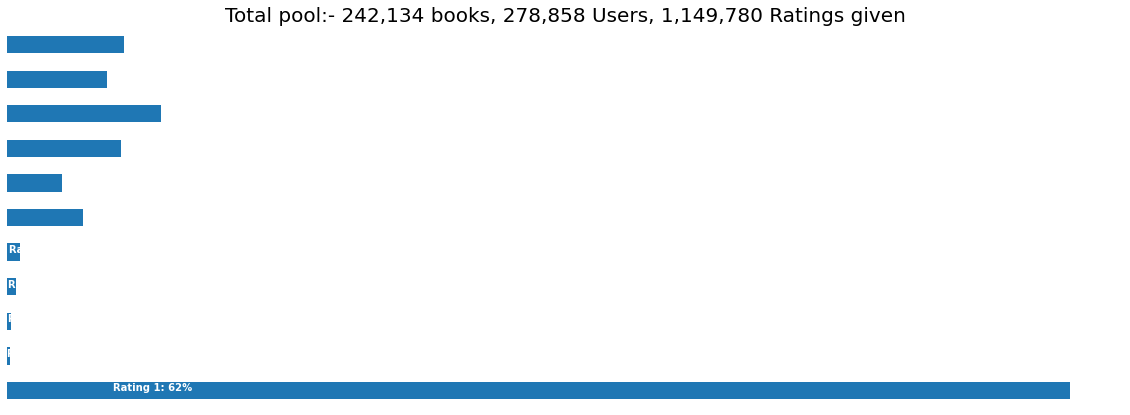

In [52]:
p = ratings.groupby('rating')['rating'].agg(['count'])

# get book count
products_count = books['title'].nunique()
# get customer count
users_count = users['user_id'].nunique()
# get rating count
rating_count = ratings['rating'].count()
#Plottng graph
ax = p.plot(kind = 'barh', legend = False, figsize = (20,7))
plt.title('Total pool:- {:,} books, {:,} Users, {:,} Ratings given'.format(products_count, users_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/10, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

Here we can see that we have data
1)Number of books - 242134
2)Number of users -278858
3)Total Number of Ratings- 1149780
Let's explore the Data about Age distrubution of users.

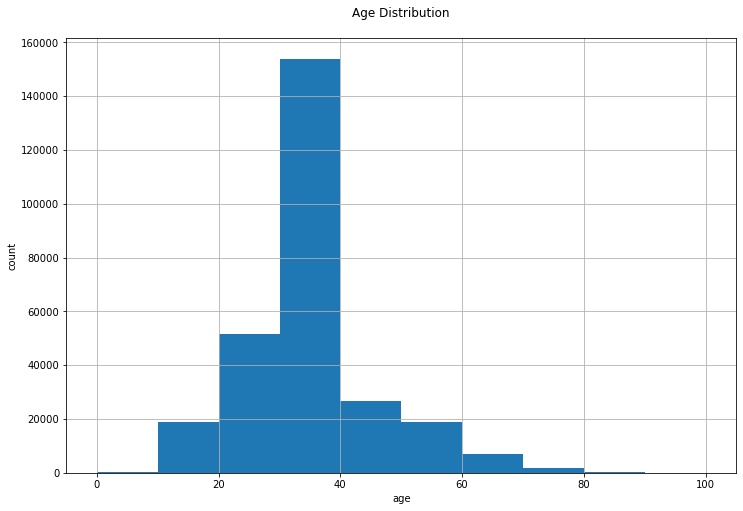

In [53]:
#Plot histogram to see the distribution of the data
fig = plt.figure(figsize = (12,8))
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

We can conclude between users with age between 20-40 are highest in number.

C:\Users\rashm\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


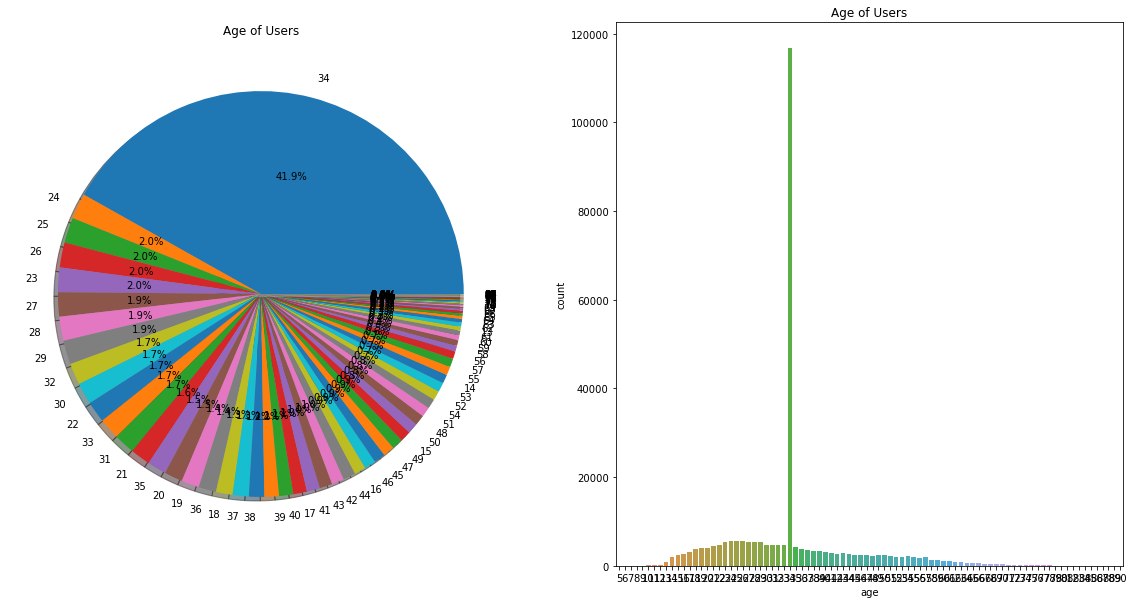

In [54]:
#Plotting pie chart of age variable
f,ax=plt.subplots(1,2,figsize=(20,10))
users.age.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Age of Users')
ax[0].set_ylabel('')

#Plotting countplot of age variable
sns.countplot('age',data=users,ax=ax[1])
ax[1].set_title('Age of Users')
plt.show()

# From above plots we observed that 41.9% of age 34 group read more books compared to other age groups.
Also the users with the age 60 and above do not read more books.
Let's see which rating people tend to give more :

Text(0.5, 1.0, 'Rating countplot')

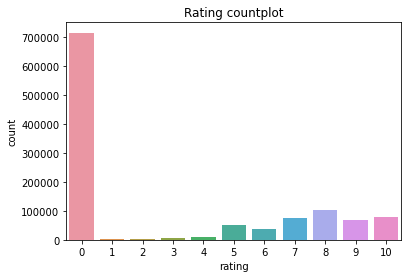

In [55]:
# Plotting count of rating to see how it's distributed
sns.countplot(x='rating',data=ratings)
plt.title("Rating countplot")

This countplot shows users have rated 0 the most, which can mean they haven't rated books at all.
Now we have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [56]:
# Separating ratings
ratings_explicit= unique_ratings[unique_ratings['rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['rating'] == 0]

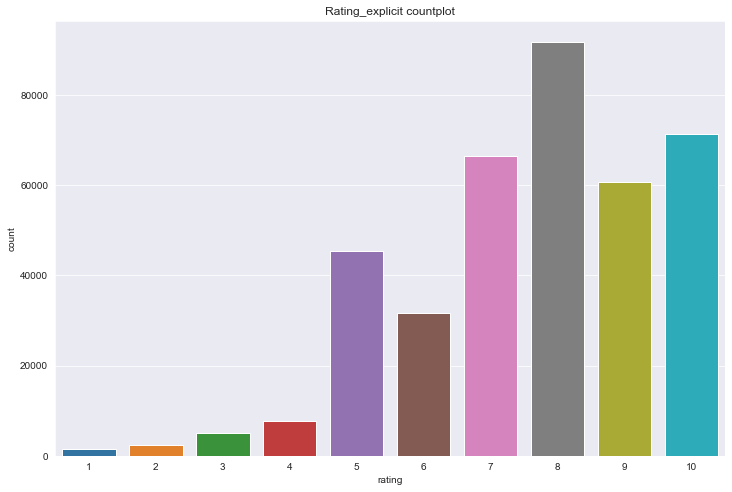

In [57]:
# Now plotting countplot of rating_explicit
fig = plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='rating')
plt.title("Rating_explicit countplot")
plt.show()

# Now, This countplot of rating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times then 10 & 7.
As the problem of string 'year' values was solved in the preprocessing steps, so now there's no need to convert the data types.
Plotted this interactive plot to see more accurately the 'year_of _publication'(year column) distribution.

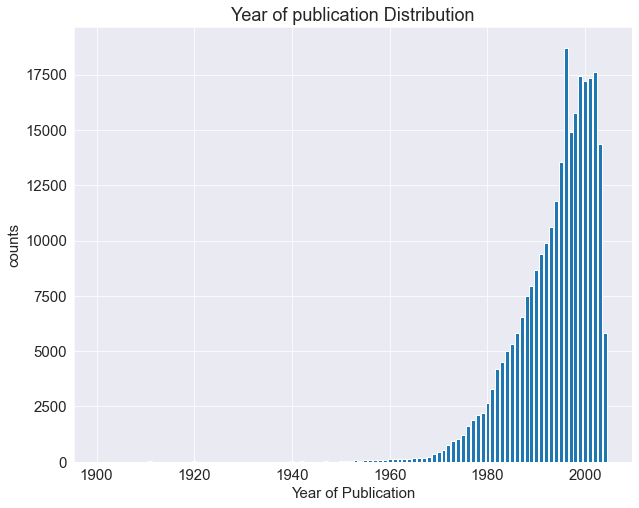

In [58]:
# Plotting bar plot
years = books.year.value_counts().sort_index()
years = years.where(years>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(years.index, years.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.title("Year of publication Distribution")
plt.show()

So we can observe that publication years are somewhat between 1950 - 2005 here.
Let's explore about Users-Locality

In [59]:
users['location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany    1   
-, bayern, germany                               1   
bouchegouf, guelma, algeria                      1   
indiana and philadelphia, pennsylvania, usa      1   
tacoma, washington, united kingdom               1   
Name: location, Length: 57339, dtype: int64

Text(0.5, 1.0, 'No of readers from each city (Top 10)')

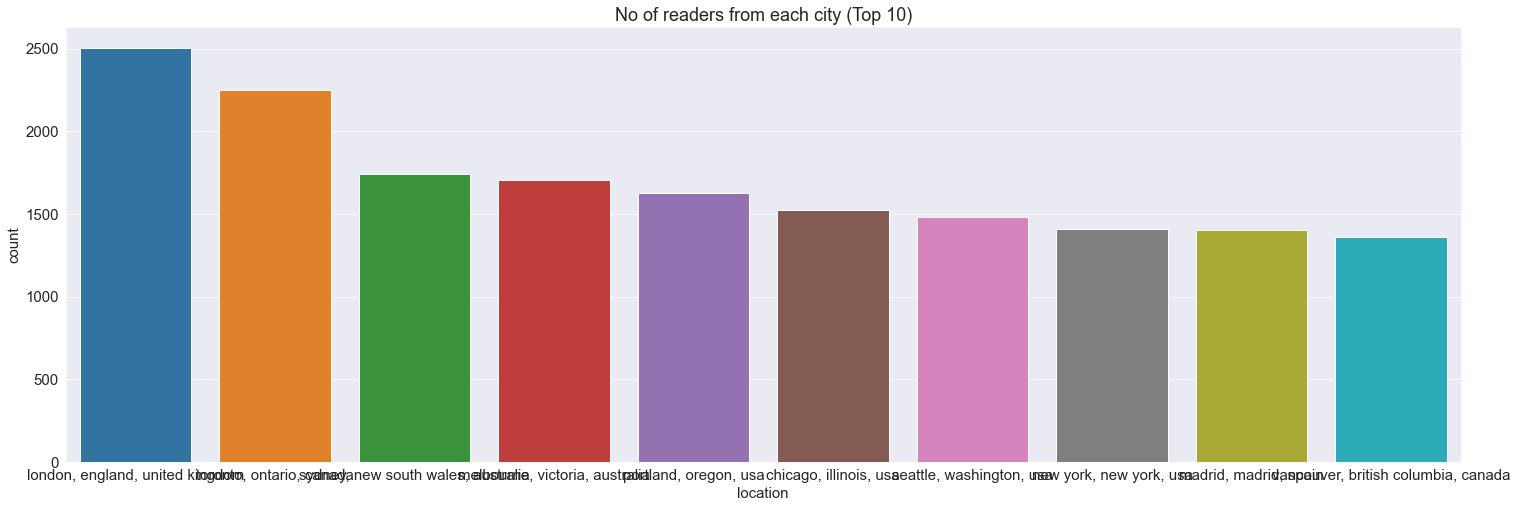

In [60]:
#Let's explore about Locations of top users
plt.figure(figsize=(25,8))
sns.countplot(x="location", data=users,order=users['location'].value_counts().index[0:10])
plt.title("No of readers from each city (Top 10)")

Here we can see that user with locations London,england,united kingdom,toronto,ontario,canda are high in numbers.
Let's see which are top 10 books.

Text(0.5, 1.0, 'Top 10 books')

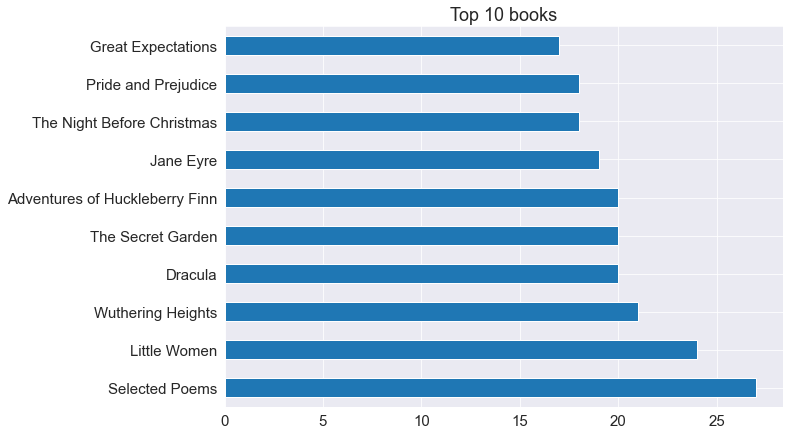

In [62]:
# Top 10 Products
ax = books['title'].value_counts()[:10].plot(kind = 'barh', legend = False, figsize = (10,7))
plt.title('Top 10 books') 

# Popularity Based Recommendation(Base model)

these systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

In [63]:
#Top 5 rows of ratings_explicit
ratings_explicit.head()

,user_id,ISBN,rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [64]:
# Print shapes of unique_ratings and ratings_explicit
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031135, 3)
(383841, 3)


In [65]:
#We'll only consider ISBNs that were explicitely rated for this recommendation system.

# Merging ratings_explicit with books dataset on ISBNs feature
new_book= pd.merge(books, ratings_explicit, on='ISBN')
new_book.head()

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [66]:
print(new_book.shape) # get shape

(383841, 7)


In [67]:
# Grouping group data based on title and aggregate based on rating
top_ten_books= pd.DataFrame(new_book.groupby('title')['rating'].count().sort_values(ascending=False).head(10))

In [68]:
# Printing top ten books 
print('The top ten books recommendations are :')
top_ten_books

The top ten books recommendations are :


,rating
title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


In [69]:
top_ten_books=top_ten_books.reset_index() # Reset the index  
# Print a concise summary of a DataFrame
top_ten_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10 non-null     object
 1   rating  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


Text(0.5, 1.0, 'Top Ten Books')

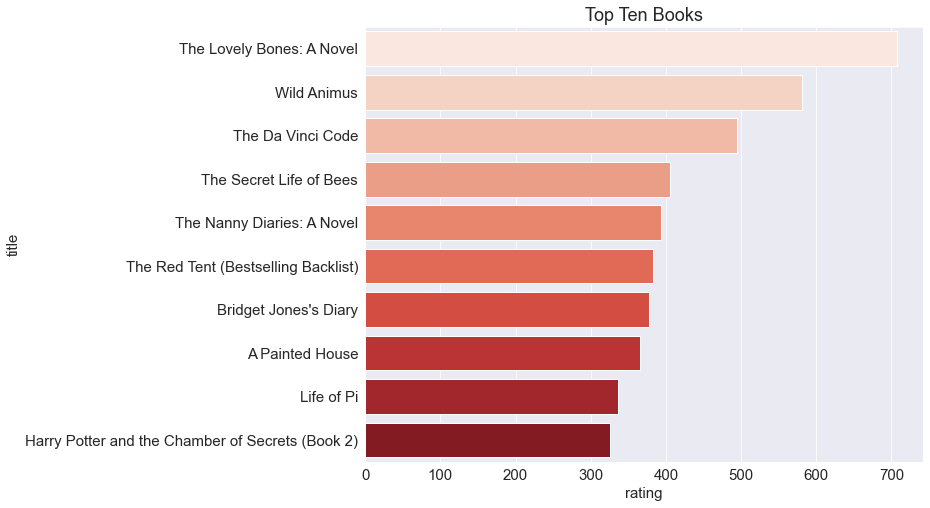

In [70]:
# Plotting horizontal bar blot
plt.figure(figsize=(10, 8))
g=sns.barplot(x='rating',y='title',data=top_ten_books, orient='h', palette="Reds")
plt.title("Top Ten Books")

So our book recommendations are ready by using popularity based recommendation.

# Collaborative Filtering Using KNN ( k-Nearest Neighbors)
kNN(k-Nearest Neighbors) as an algorithm seems to be inspired from real life. The full k-nearest neighbors algorithm works much in the way some of us ask for recommendations from our friends. First, we start with people whose taste we feel we share, and then we ask a bunch of them to recommend something to us. If many of them recommend the same thing, we deduce that we’ll like it as well. Our behaviour is guided by the friends we grew up with.kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

Here we assume that users who given ratings more than 200 are users who read atleast 20 books(suppose on user given rating 10/10 so minimum he read books(200 ratings/10 ratings per book=20).For statisfical significance we should consider only the data of user who given more than 200 ratings.
To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [71]:
#Users with more than 200 ratings 
numbers1 = ratings_explicit['user_id'].value_counts()
ratings = ratings_explicit[ratings_explicit['user_id'].isin(numbers1[numbers1 >= 200].index)]
#Books with more than 100 Ratings
number2 = ratings_explicit['rating'].value_counts()
ratings = ratings_explicit[ratings_explicit['rating'].isin(number2[number2 >= 100].index)]

# The dataset 'Ratings' and 'Books' have common column 'ISBN' so create new dataframe merging the two dataframes.

In [72]:
#Merging the dataset ratings and Books
books_with_rating = pd.merge(ratings, books, on='ISBN')
books_with_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday


In [73]:
#Now we will group by book titles and create a new column for total rating count.
rating_count_df =books_with_rating.groupby('title')['rating'].count().reset_index() ## gropuing 

In [74]:
#Print top 5 rows of dataset
rating_count_df.head()

,title,rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [75]:
#Rename the column rating with total ratings
rating_count_df.rename(columns={'rating':'total_ratings'},inplace=True)

Now we will combine the books_with_rating with the rating_count_df data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [76]:
#Merging the dataframes
totalRatingCount_df = books_with_rating.merge(rating_count_df, left_on = 'title', right_on = 'title', how = 'left')
totalRatingCount_df.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,5
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,1
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,1
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,366
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,366


In [77]:
#We wiil consider the only books having minimum total 50 ratings.
#let's keep threshold value 50 
popularity_threshold = 50
rating_popular_book = totalRatingCount_df.query('total_ratings >= @popularity_threshold')
rating_popular_book.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,366
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,366
5,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,366
6,17975,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,366
7,20806,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,366


In [78]:
#merge the 'users' dataframe with 'rating_popular_book' dataframe
combined = rating_popular_book.merge(users, left_on = 'user_id', right_on = 'user_id', how = 'left')## merging the dataframes

In [79]:
combined.head()

,user_id,ISBN,rating,title,author,year,publisher,total_ratings,location,age
0,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,366,"torrance, california, usa",34
1,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,366,"n/a, n/a, n/a",34
2,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,366,"houston, arkansas, usa",37
3,17975,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,366,"fargo, north dakota, usa",34
4,20806,038550120X,6,A Painted House,JOHN GRISHAM,2001,Doubleday,366,"union, kentucky, usa",34


In [80]:
combined.shape

(65477, 10)

In [81]:
#Comibned dataframe's duplicate values should be drop  
combined.drop_duplicates(['user_id','title'],inplace=True)

In [82]:
# importing library
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [83]:
# Creating pivot table
pivot_matrix=combined.pivot(index='title',values='rating',columns='user_id')
# Returning top 5 rows
pivot_matrix.head()

user_id,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Filling Nan values to 0
pivot_matrix.fillna(0, inplace=True)
#Print top 5 rows of pivot matrix
pivot_matrix.head()

user_id,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from scipy.sparse import csr_matrix
#csr is compressed sparse matrix since there are lots of NAn-->0
book_sparse = csr_matrix(pivot_matrix)

In [86]:
# metric used for evaluation is cosine and algorithm is brute
model = NearestNeighbors(metric = 'cosine',algorithm='brute')

In [87]:
#Let's fit the model 
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [88]:
#Generating random book indices out of the book_matrix
random_book = np.random.choice(pivot_matrix.shape[0])
print(random_book)
print(pivot_matrix.iloc[random_book,:].values.reshape(1,-1))
#Apply the k neighbors to fiited model this will create clusters
distances, indices = model.kneighbors(pivot_matrix.iloc[random_book,:].values.reshape(1, -1), n_neighbors = 6)
pivot_matrix.index[random_book]

359
[[0. 0. 0. ... 0. 0. 0.]]


'Quentins'

In [89]:
#Printing the random book name and suggested books.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[random_book]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Quentins:

1: The Glass Lake, with distance of 0.8830315928405345:
2: Angels, with distance of 0.8894168813447574:
3: Circle of Friends, with distance of 0.9199748899587497:
4: A Painted House, with distance of 0.9283924086682817:
5: Shopaholic Takes Manhattan (Summer Display Opportunity), with distance of 0.9296450380632365:


In [90]:
#Function to get recommandation for known books from our dataset.
def recommand_books(book_name):
   book_id = np.where(pivot_matrix.index==book_name)[0][0]
   print(book_id)
   distances ,suggestions = model.kneighbors(pivot_matrix.iloc[book_id,:].values.reshape(1,-1),n_neighbors = 6)
   
   for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivot_matrix.index[book_id]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot_matrix.index[suggestions.flatten()[i]], distances.flatten()[i]))

In [91]:
#Let's try to get recommandation for book 'Prey'
recommand_books('1984')

0
Recommendations for 1984:

1: Animal Farm, with distance of 0.8441751059913439:
2: Brave New World, with distance of 0.8630224130863633:
3: The Vampire Lestat (Vampire Chronicles, Book II), with distance of 0.9098446731344783:
4: Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death, with distance of 0.9102283484822355:
5: American Psycho (Vintage Contemporaries), with distance of 0.9126168848307201:


we have good recommandation here with distances near to value 1.

In [108]:
SVD

surprise.prediction_algorithms.matrix_factorization.SVD

# SVD(Singular Value Decomposition) Based recommendation System- Modeled by Saurabh Yadav
The SVD(Singular Value Decomposition) is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

In [92]:
# Importing Reader & Dataset from surprise
from surprise import Reader, Dataset
# Creating a 'Reader' object to set the limit of the ratings 
reader = Reader(rating_scale=(1, 10))
# Loading our ratings_explicit data
data = Dataset.load_from_df(ratings_explicit, reader)

In [93]:
from surprise import SVD, model_selection, accuracy
# Using the famous SVD algorithm
model = SVD()

# Train on explicit_rating dataset
# Runing 5-fold cross-validation and print results
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6364  1.6392  1.6382  1.6410  1.6313  1.6372  0.0033  
Fit time          27.22   25.20   24.98   26.35   27.04   26.16   0.92    
Test time         1.06    0.90    0.71    0.80    0.82    0.86    0.12    
Wall time: 2min 22s


{'test_rmse': array([1.63644711, 1.63915812, 1.63817203, 1.64096502, 1.63127316]),
 'fit_time': (27.215588092803955,
  25.19507646560669,
  24.981695652008057,
  26.353959321975708,
  27.044188737869263),
 'test_time': (1.0575098991394043,
  0.9023406505584717,
  0.7052497863769531,
  0.7976953983306885,
  0.8159778118133545)}

# Train - Test Split

In [95]:
# train test split on our data
trainset, testset = model_selection.train_test_split(data, test_size=0.2)
# creating svd model
model = SVD()
# Fit the model
model.fit(trainset)
# Predict the model on test data
predictions = model.test(testset)
# Evaluating model
accuracy.rmse(predictions)

RMSE: 1.6346


1.634577142498203

RMSE score has improved a lot. It is now on average 1.64 which is pretty good.

# Testing Results

In [96]:
# Taking an arbitrary user-id and item-id to test our model.
uid = 276744  
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.20   {'was_impossible': False}


In [97]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rating= ratings_explicit[(ratings_explicit.user_id==pred.uid) & 
                             (ratings_explicit.ISBN==pred.iid)].rating.values[0]
print(f'The real rating given for this was {actual_rating:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.20.

The real rating given for this was 7.00.


In [98]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [99]:
# Predicting modelon testset
pred = model.test(testset)
# top-N recommendation for each user from a set of predictions
top_n = get_top_n(pred)

In [100]:
#Function to get recommandation by giving user-id as input.
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title_ = new_book.loc[new_book.ISBN==book].title.unique()[0]
        reading_list[title_] = rating
    return reading_list

In [101]:
# Just picking a random user_id=116866
example_reading_list = get_reading_list(userid = 116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Clara Callan: 7.935750183673119
Simulation Modeling and Analysis (Mcgraw-Hill Series in Industrial Engineering and Management Science): 7.7684986498308195
The Moons of Jupiter: 7.7684986498308195
The Complete Idiot's Guide to Javascript: 7.7684986498308195
Women Talking Dirty: 7.7684986498308195
The Best of Creative Computing: 7.7684986498308195
Spanish Lessons : Beginning a New Life in Spain: 7.653155036016738
Full Spectrum 3: 7.5242881795204575
Climbing Mount Improbable: 7.442875997603432
The Progress of Love (King Penguin): 7.406990374409281


In [106]:
model.shape()

AttributeError: 'SVD' object has no attribute 'shape'

In [103]:
import pickle

In [104]:
filename='ModelRecommender.sav'
pickle.dump(model,open(filename,'wb'))